In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import scipy as sp
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [8]:
bin(3).split('b')[1][1]

'1'

In [2]:
lc1 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc')
lc2 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q1.lc')
lc3 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q2.lc')
lc4 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q3.lc')

In [3]:
lc1_data = lc1[1].data
lc2_data = lc2[1].data
lc3_data = lc3[1].data
lc4_data = lc4[1].data

np.where(lc1_data['RATE'] == max(lc1_data['RATE']))

(array([1801]),)

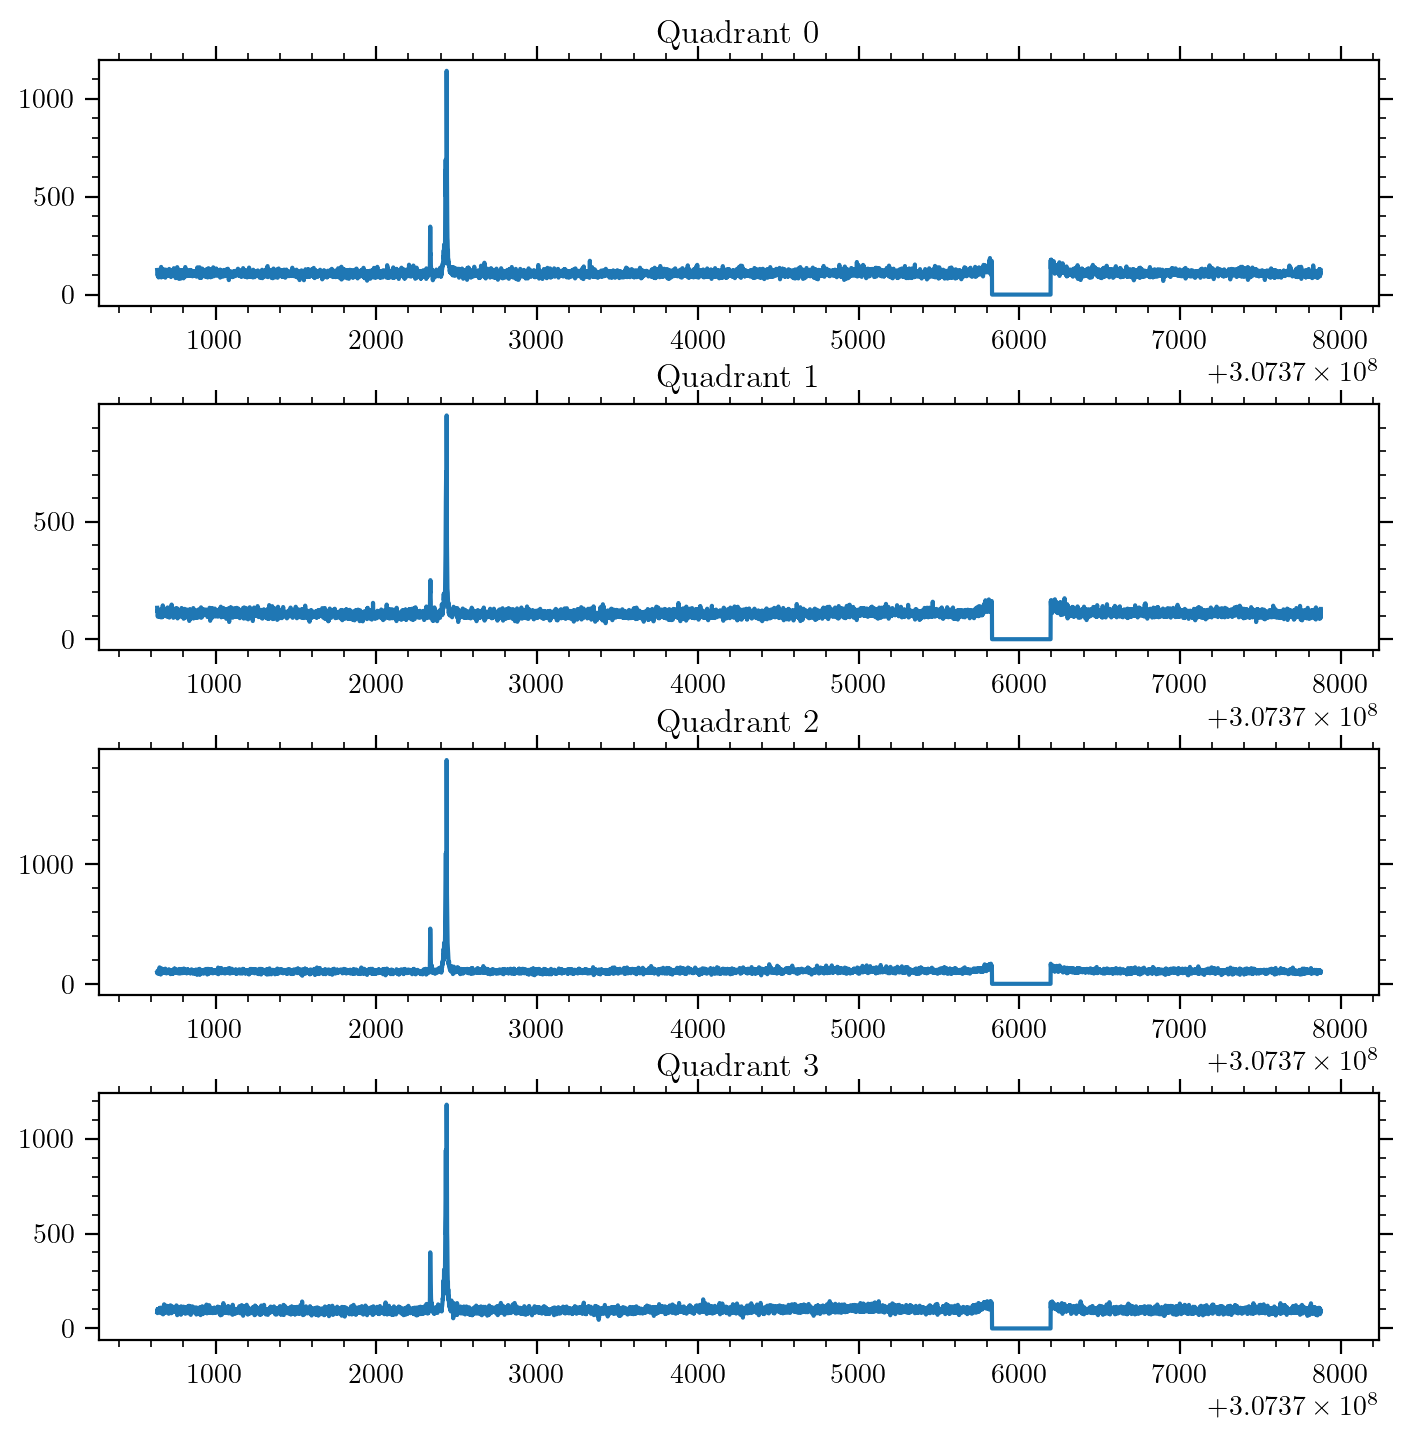

In [4]:
plt.figure(figsize=(8,8), dpi=200)
plt.subplot(4,1,1)
plt.plot(lc1_data.field('TIME'), lc1_data.field('RATE'))
plt.title("Quadrant 0")
plt.subplot(4,1,2)
plt.plot(lc2_data.field('TIME'), lc2_data.field('RATE'))
plt.title("Quadrant 1")
plt.subplot(4,1,3)
plt.plot(lc3_data.field('TIME'), lc3_data.field('RATE'))
plt.title("Quadrant 2")
plt.subplot(4,1,4)
plt.plot(lc4_data.field('TIME'), lc4_data.field('RATE'))
plt.title("Quadrant 3")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

NameError: name 'lc1_unfiltered_data' is not defined

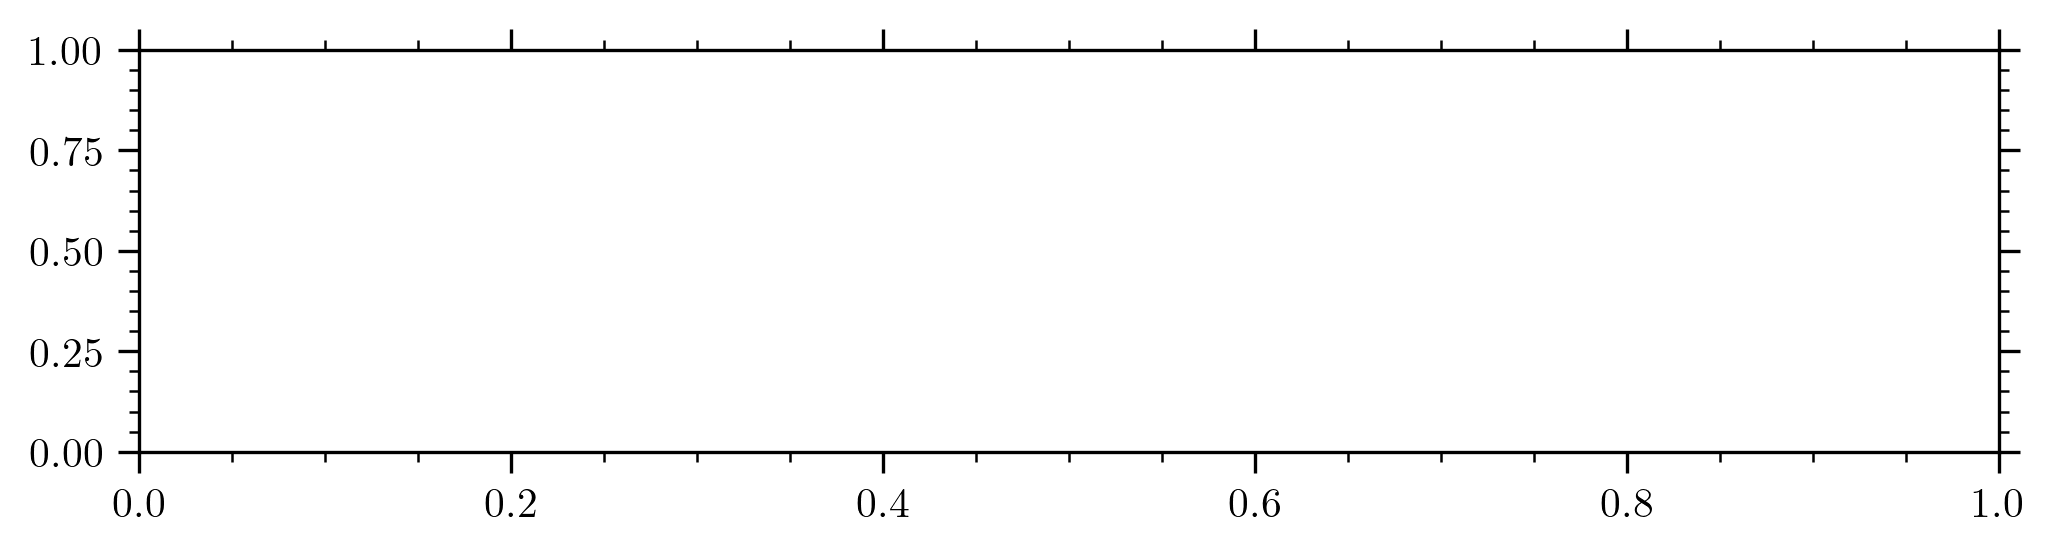

In [5]:
plt.figure(figsize=(8,8), dpi=300)
plt.subplot(4,1,1)
plt.plot(lc1_unfiltered_data.field('TIME'), lc1_unfiltered_data.field('RATE'))
plt.plot(lc1_data.field('TIME'), lc1_data.field('RATE'))
plt.title("Quadrant 0")
plt.legend(['Unfiltered', 'Filtered'])
plt.subplot(4,1,2)
plt.plot(lc2_unfiltered_data.field('TIME'), lc2_unfiltered_data.field('RATE'))
plt.plot(lc2_data.field('TIME'), lc2_data.field('RATE'))
plt.title("Quadrant 1")
plt.legend(['Unfiltered', 'Filtered'])
plt.subplot(4,1,3)
plt.plot(lc3_unfiltered_data.field('TIME'), lc3_unfiltered_data.field('RATE'))
plt.plot(lc3_data.field('TIME'), lc3_data.field('RATE'))
plt.title("Quadrant 2")
plt.legend(['Unfiltered', 'Filtered'])
plt.subplot(4,1,4)
plt.plot(lc4_unfiltered_data.field('TIME'), lc4_unfiltered_data.field('RATE'))
plt.plot(lc4_data.field('TIME'), lc4_data.field('RATE'))
plt.title("Quadrant 3")
plt.legend(['Unfiltered', 'Filtered'])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [ ]:
spectrum1 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.pha')
spectrum2 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q1.pha')
spectrum3 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q2.pha')
spectrum4 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q3.pha')

In [ ]:
spectrum1_data = spectrum1[1].data
spectrum2_data = spectrum2[1].data
spectrum3_data = spectrum3[1].data
spectrum4_data = spectrum4[1].data

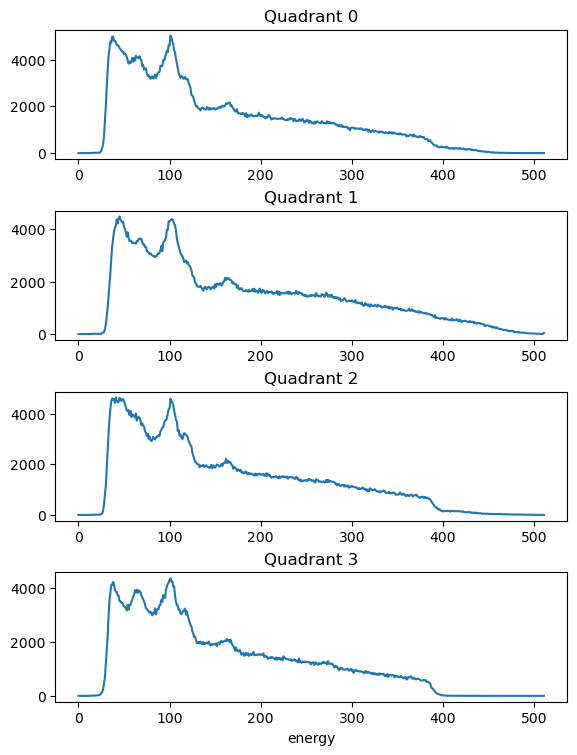

In [ ]:
plt.figure
plt.subplot(4,1,1)
plt.plot(spectrum1_data.field('CHANNEL'), spectrum1_data.field('COUNTS'))
plt.title("Quadrant 0")
plt.subplot(4,1,2)
plt.plot(spectrum2_data.field('CHANNEL'), spectrum2_data.field('COUNTS'))
plt.title("Quadrant 1")
plt.subplot(4,1,3)
plt.plot(spectrum3_data.field('CHANNEL'), spectrum3_data.field('COUNTS'))
plt.title("Quadrant 2")
plt.subplot(4,1,4)
plt.plot(spectrum4_data.field('CHANNEL'), spectrum4_data.field('COUNTS'))
plt.title("Quadrant 3")
plt.xlabel("energy")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

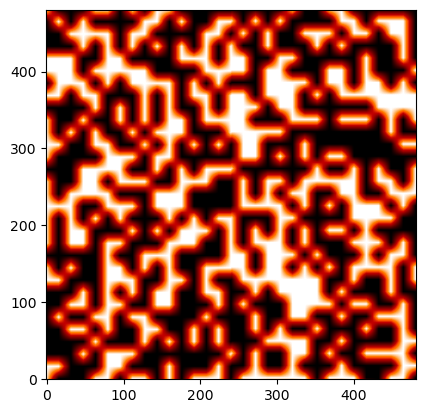

In [ ]:
imageq0 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_test.img_Q0')
imageq1 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_test.img_Q1')
imageq2 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.img_Q0')
imageq3 = fits.open('data/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean.img_Q1')
plt.imshow(imageq0[1].data, cmap='gist_heat')
plt.gca().invert_yaxis()

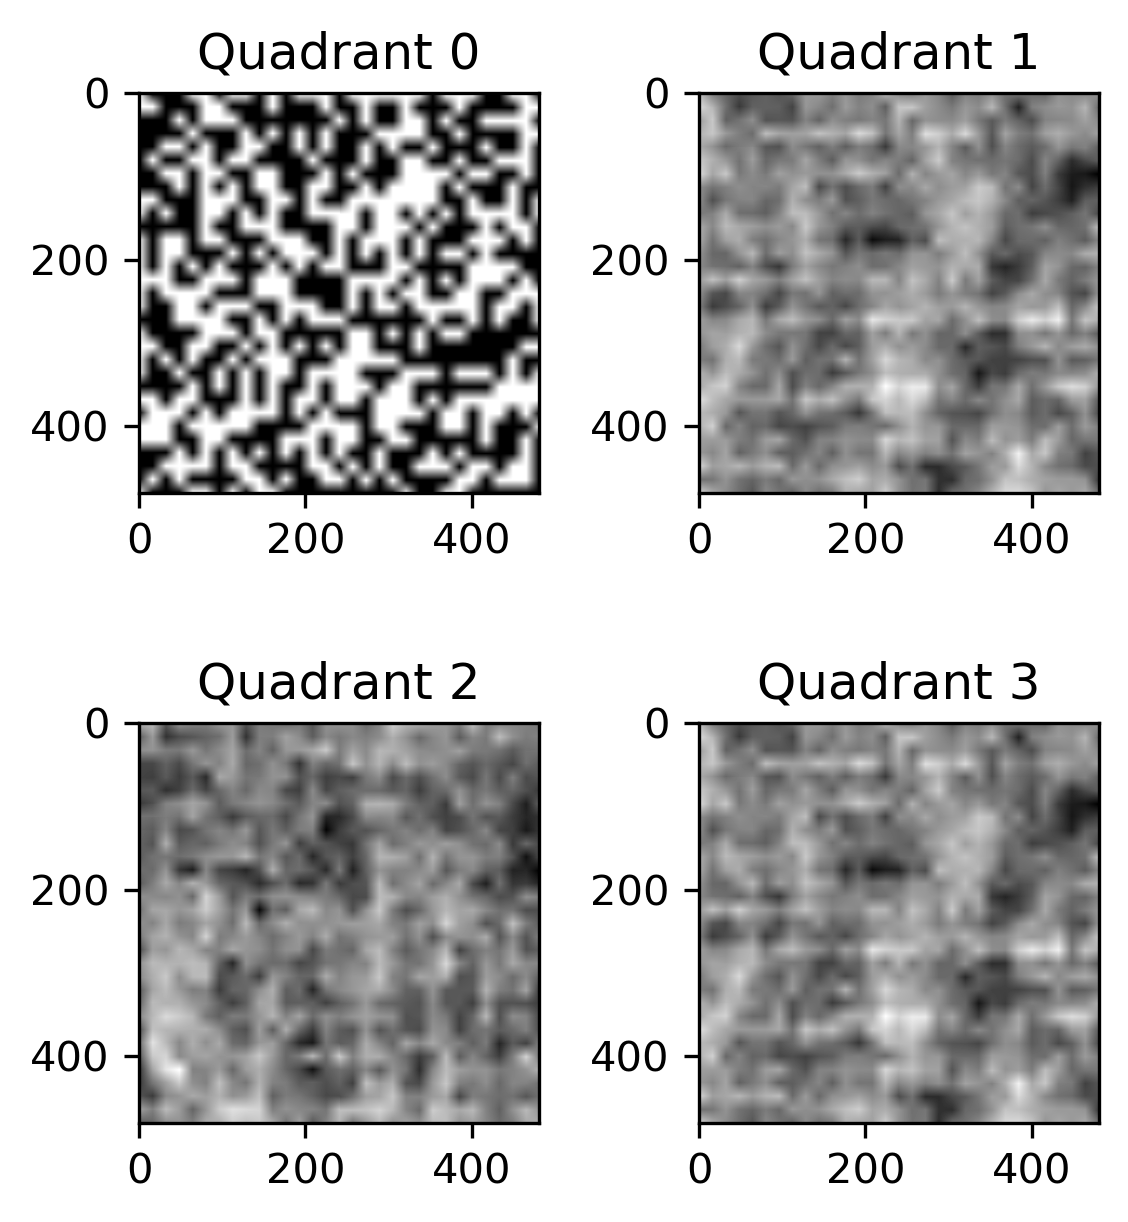

In [ ]:
plt.figure(figsize=(8,8), dpi=300)
plt.subplot(2,2,1)
plt.imshow(imageq0[1].data, cmap='gray')
plt.title("Quadrant 0")
plt.subplot(2,2,2)
plt.imshow(imageq1[1].data, cmap='gray')
plt.title("Quadrant 1")
plt.subplot(2,2,3)
plt.imshow(imageq2[1].data, cmap='gray')
plt.title("Quadrant 2")
plt.subplot(2,2,4)
plt.imshow(imageq3[1].data, cmap='gray')
plt.title("Quadrant 3")
plt.subplots_adjust(left=0.5,
                    bottom=0.45,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

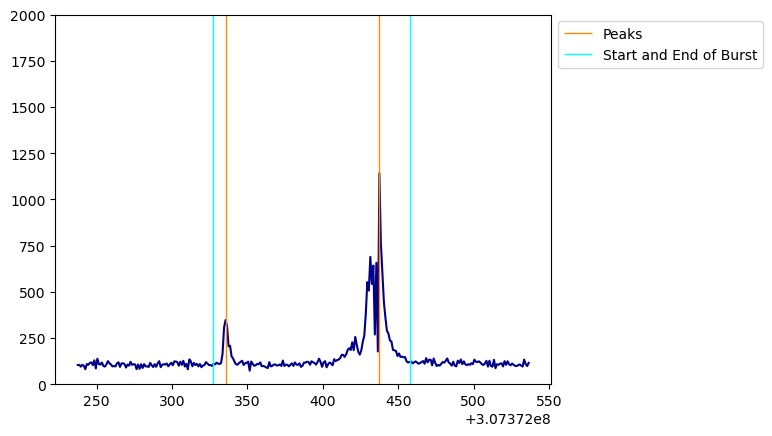

In [ ]:
#creating plot for just the grb and marking it
max = int(np.where(lc1_data['RATE'] == np.max(lc1_data['RATE']))[0])
plt.plot(lc1_data['TIME'][max-200:max+100], lc1_data['RATE'][max-200:max+100], color='darkblue')
plt.ylim(0,2000)
plt.vlines(x = [lc1_data['TIME'][max], lc1_data['TIME'][max-102]],ymin=0, ymax=2000, color = 'darkorange', label = 'Peaks', linewidth=1)
plt.vlines(x = [lc1_data['TIME'][max+20], lc1_data['TIME'][max-110]], ymin=0, ymax=2000, color = 'cyan', label = 'Start and End of Burst', linewidth=1)
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

In [ ]:
#time of grb
duration = lc1_data['TIME'][max+20] - lc1_data['TIME'][max-110]
print("The duration of the GRB is " + str(duration) + " seconds")
print(lc1_data['TIME'][max-110])
print(lc1_data['TIME'][max+20])
print(lc1_data['TIME'][max])
print(max-110)
print(max+20)

The duration of the GRB is 130.0 seconds
307372327.5
307372457.5
307372437.5
1691
1821


0.0028339266


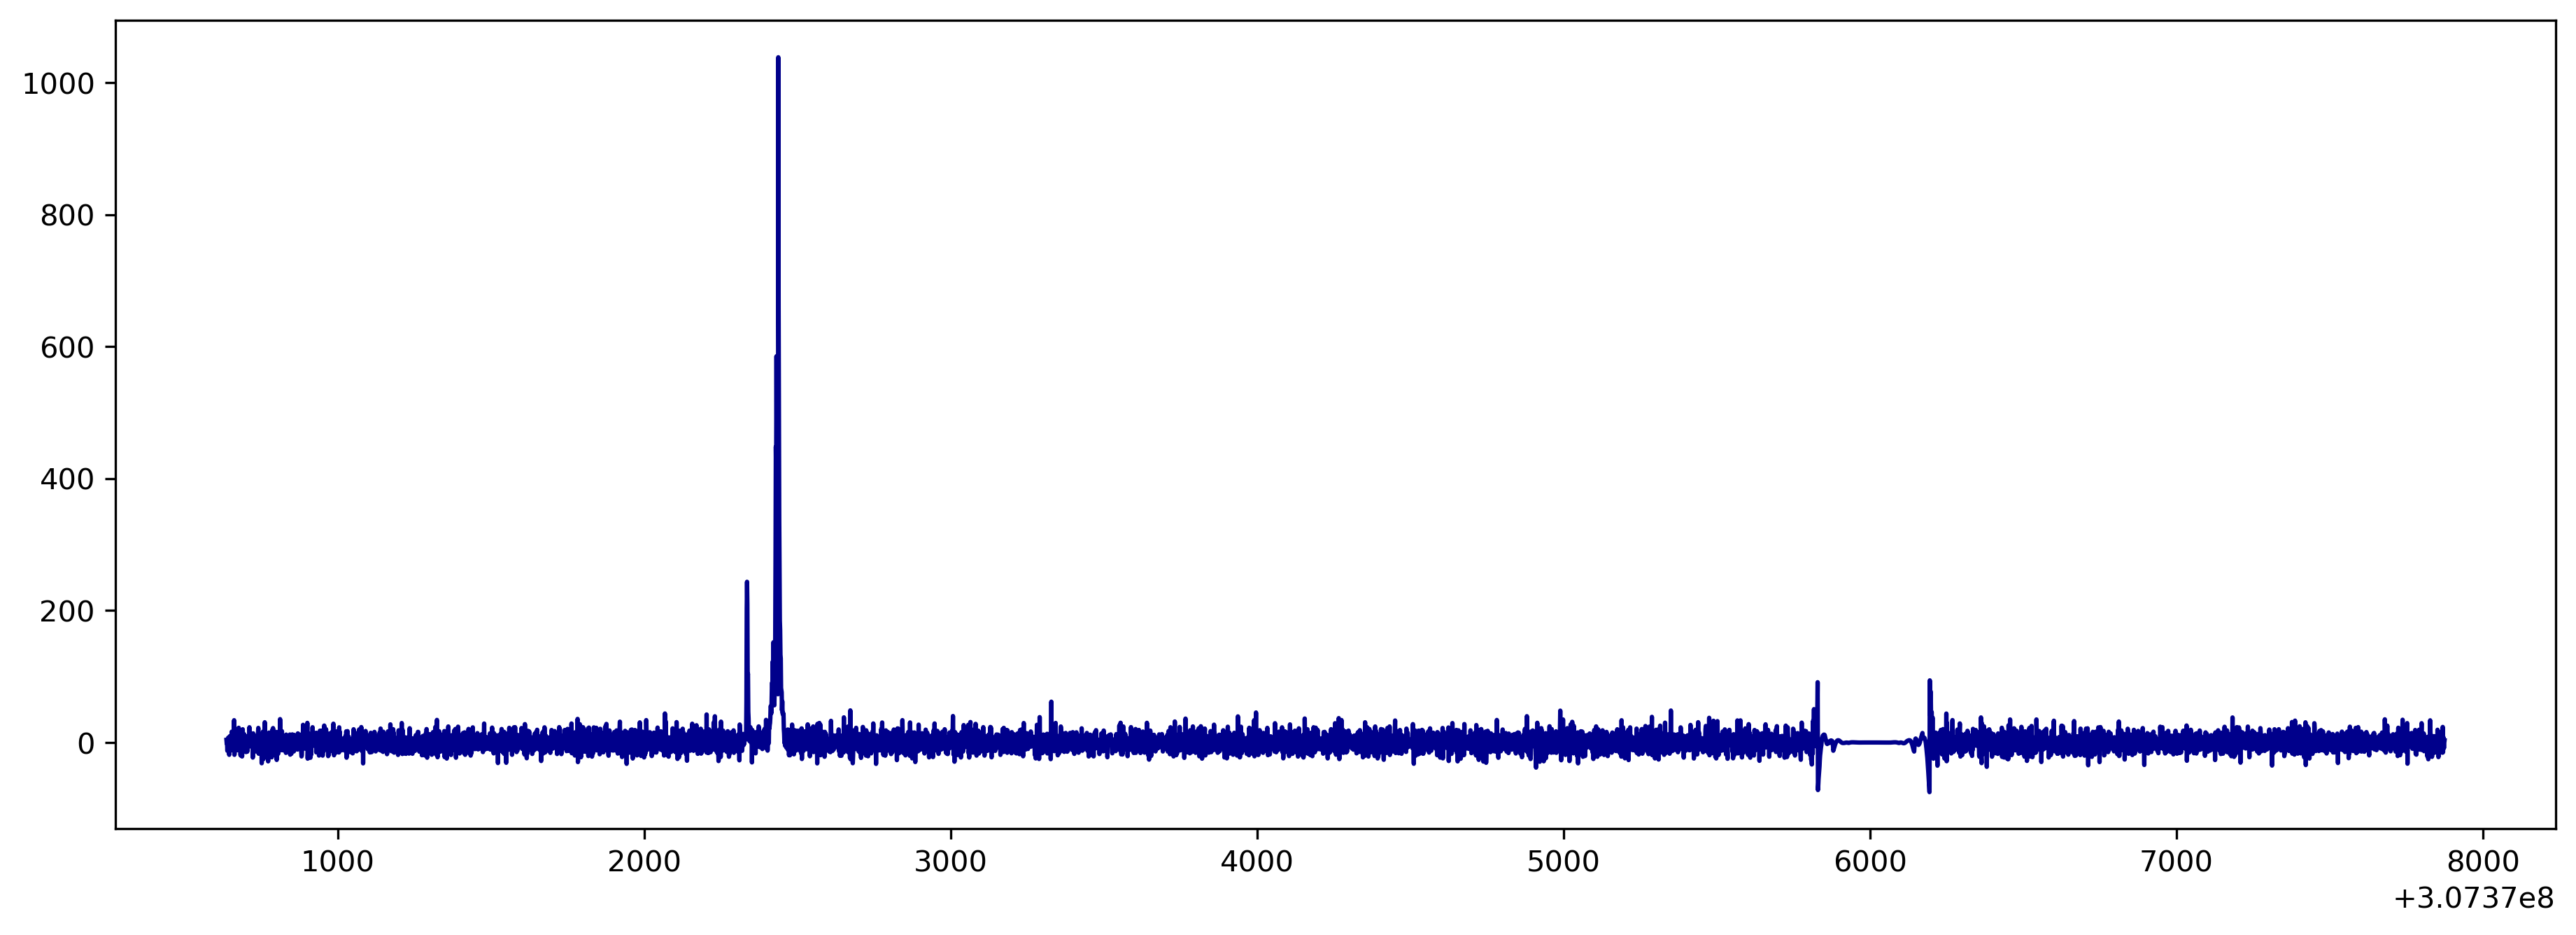

In [ ]:
#applying the savgol filter to the data
lc1_data['RATE'][max-110:max+20] -= np.median(lc1_data['RATE'][:max-110])
lc1_data['RATE'][:max-110] -= savgol_filter(lc1_data['RATE'][:max-110], 101, 10)
lc1_data['RATE'][max+20:] -= savgol_filter(lc1_data['RATE'][max+20:], 101, 10)
plt.figure(figsize=(15,5), dpi=300)
plt.plot(lc1_data['TIME'], lc1_data['RATE'], color='darkblue')
print(np.mean(lc1_data['RATE'][max+20:max+3200]))

The signal to noise ratio is 8.643059007380467


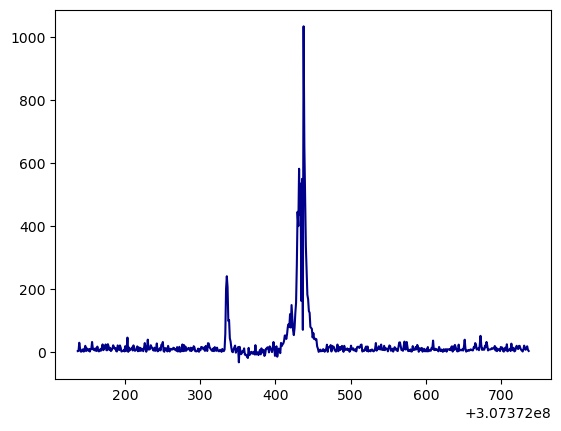

In [ ]:
#to get an accurate estimate of signal to noise ratio, values in the background are all made positive
# lc1_data['RATE'][:max-110] = np.abs(lc1_data['RATE'][:max-110])
# lc1_data['RATE'][max+20:] = np.abs(lc1_data['RATE'][max+20:])
# plt.plot(lc1_data['TIME'][max-300:max+300], lc1_data['RATE'][max-300:max+300], color='darkblue')
# noise = (np.mean(lc1_data['RATE'][:max-110])+np.mean(lc1_data['RATE'][max+20:max+3000]))/2
# signal = np.sum(lc1_data['RATE'][max-110:max+20])/(duration)
# print("The signal to noise ratio is " + str(signal/noise))

The signal to noise ratio is 117.20764436174838


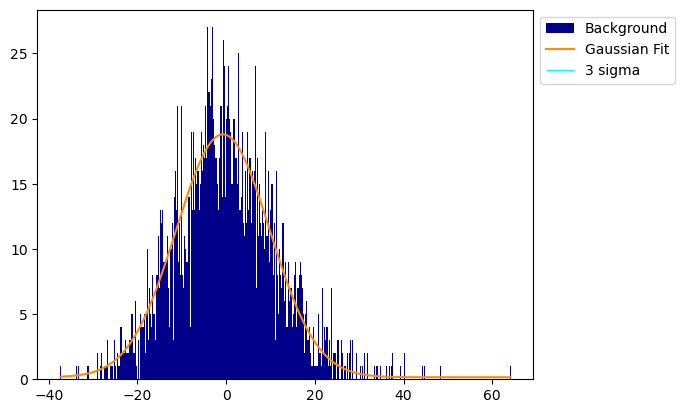

In [ ]:
#model the noise as a gaussian
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c
p0 = [20, 0, 1, 0]
plt.hist(lc1_data['RATE'][max+500:max+3000], bins=500, color='darkblue', label='Background')
n, bins = np.histogram(lc1_data['RATE'][max+500:max+3000], bins=500)
n_signal, bins_signal = np.histogram(lc1_data['RATE'][:max+3000], bins=200)
bin_centers = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
bin_centers_signal = np.array([0.5*(bins_signal[i]+bins_signal[i+1]) for i in range(len(bins_signal)-1)])
popt, pcov = curve_fit(f, bin_centers, n, p0)
plt.plot(bin_centers, f(bin_centers, *popt), color='darkorange', label='Gaussian Fit')
signal = np.sum(n_signal[np.where(bin_centers_signal > popt[1]+3*popt[2])])
noise = abs(popt[1])
plt.vlines(x = popt[1]+3*popt[2], ymin=0, ymax=0.05, color = 'cyan', label = '3 sigma', linewidth=1)
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
print("The signal to noise ratio is " + str(signal/noise))

In [ ]:
def DTFT(x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

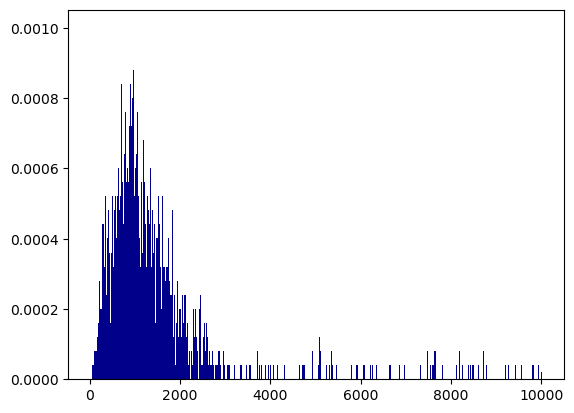

0.3778369017269014


In [ ]:
X = DTFT(lc1_data['RATE'][:max+3200])
X=X[X<40000]
plt.hist(abs(X), bins=1000, color='darkblue', label='Background', density=True)
plt.show()
signal = abs(X[abs(X)>3400])
noise = abs(X[abs(X)<3400])
print(float(np.sum(signal))/float(np.sum(noise)))
# plt.figure(figsize = (8, 6))
# plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
# plt.xlabel('Freq (Hz)')
# plt.ylabel('DFT Amplitude |X(freq)|')
# plt.show()